<a href="https://colab.research.google.com/github/Vlasovets/speech_recognition/blob/master/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

## Train

In [0]:
train = pd.read_csv('csv_train.csv', sep=',')

In [0]:
header = np.arange(0, 6374)

In [0]:
train.columns = header

In [35]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373
0,2.554157,0.134117,0.982365,0.399174,0.74399,1.083199,0.344815,0.339210,0.684025,0.125897,1.965657,1.839759,0.454876,0.596813,2.818323,0.596389,1.59,0.45,0.195990,0.497279,0.111038,0.006749,0.001089,0.442727,0.516227,0.006580,-1.885221,0.909765,0.550789,-0.898141,0.334471,5.576216,0.134553,0.690398,0.784789,1.065601,1.441291,0.280812,0.375691,0.656502,...,0.607063,3.029264,3.027681,1913.0150,0.568106,130.5027,61.86271,133.7167,68.91190,0.667082,1.723316,2.167282,0.100993,0.057842,10.273500,0.630777,2.691292,2.691582,-9273.994,0.646643,123.9579,61.94287,119.4142,58.81306,0.651420,1.403322,1.849628,0.103968,0.059069,8.239951,0.547856,2.296115,2.294919,1920.215,0.619489,105.91370,54.43164,104.58150,52.95197,FRE
1,1.524493,0.183608,0.001498,0.189475,0.22996,0.342812,0.040485,0.112852,0.153337,0.108781,1.170879,1.062097,0.221155,2.352384,9.032930,1.100833,11.44,0.46,1.879602,0.171196,0.053285,0.008132,0.003424,0.489084,0.503961,0.001005,-1.924282,1.108105,0.236835,-0.703318,0.292012,3.307423,0.131607,0.365504,0.890798,0.987849,1.142710,0.097051,0.154861,0.251912,...,0.565753,2.419919,2.417481,992.7057,0.589380,114.4943,60.13251,117.3509,59.54166,0.653157,1.327391,1.657223,0.089386,0.049955,6.988263,0.589441,2.034590,2.033893,2917.176,0.567629,103.5912,49.19407,101.1961,48.73297,0.657664,1.182425,1.498260,0.094776,0.053675,8.251408,0.607847,1.906892,1.906919,-71227.270,0.463597,94.94153,46.28285,93.48928,45.68927,SPA


In [36]:
y_train = train[6373]
y_train.head(2)

0    FRE
1    SPA
Name: 6373, dtype: object

In [0]:
train = train.iloc[:, :-1]

## Dev

In [0]:
dev = pd.read_csv('csv_dev.csv', sep=',')

In [0]:
dev.columns = header

In [40]:
dev.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373
0,3.530088,0.635352,0.000000,0.641956,1.013997,1.676991,0.37204,0.662994,1.035035,0.506228,2.873326,2.367098,0.624598,0.837602,2.877323,0.661884,6.40,0.46,0.706188,0.490691,0.162208,0.013482,0.001926,0.469178,0.527296,0.007687,-2.050633,1.272256,0.200493,-0.693913,0.278973,3.002646,0.249732,0.638776,0.834926,1.009232,1.306881,0.174305,0.297649,0.471954,...,0.588955,3.062866,3.060469,1277.318,0.583678,128.8150,67.51817,128.1010,63.50588,0.664635,1.627804,2.053371,0.096522,0.054848,8.578906,0.550617,2.512970,2.514840,-1343.934,0.591923,121.1572,58.46031,118.5247,60.9893,0.652618,1.453997,1.811190,0.101106,0.057768,8.076488,0.534679,2.284852,2.286112,-1813.286,0.611738,104.9605,51.84484,106.1112,53.66180,HIN
1,2.706301,0.242823,0.001295,0.346778,0.763618,1.259882,0.41684,0.496264,0.913105,0.140831,2.285919,2.145088,0.567527,0.672909,2.555573,0.593553,2.69,0.46,0.272892,0.511764,0.195769,0.023095,0.002590,0.482297,0.506154,0.004868,-2.146818,1.401919,0.191342,-0.723415,0.286540,4.127019,0.015325,0.202676,0.781621,1.072510,1.530215,0.290888,0.457705,0.748594,...,0.668709,3.024795,3.023263,1975.073,0.580114,124.4475,60.64391,126.9987,61.00551,0.646484,1.617714,2.040294,0.099185,0.057136,7.437950,0.517014,2.466297,2.466509,-11632.240,0.597461,118.1144,62.38587,111.9878,58.4858,0.638641,1.476635,1.970279,0.112537,0.064950,9.006743,0.564074,2.479765,2.478522,1995.745,0.541574,104.6046,51.71428,107.7339,56.51631,KOR


In [41]:
y_dev = dev[6373]
y_dev.head(2)

0    HIN
1    KOR
Name: 6373, dtype: object

In [0]:
dev = dev.iloc[:, :-1]

## Test

In [0]:
test = pd.read_csv('csv_test.csv', sep=',')

In [0]:
header = np.arange(0, 6374)

In [0]:
test.columns = header

In [46]:
test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373
0,2.655310,0.707101,0.549536,0.218329,0.397093,0.672678,0.178764,0.275585,0.454349,0.126861,1.637669,1.510808,0.338872,1.608370,7.006693,0.796727,3.31,0.46,0.603538,0.188431,0.018131,0.003453,0.000648,0.437392,0.522349,0.004719,-2.008516,1.420886,-0.162471,-0.445818,0.213312,6.395654,0.931578,0.516296,0.774924,1.004606,1.436857,0.229682,0.432251,0.661932,...,0.626472,2.938490,2.935258,909.2727,0.620898,133.9885,65.45541,139.1346,67.50035,0.654187,1.687612,2.188400,0.098632,0.055851,9.069361,0.566309,2.707332,2.704763,1053.936,0.571017,123.4151,58.82057,126.9514,61.27251,0.655597,1.565644,2.010583,0.106984,0.061542,9.450972,0.568960,2.516102,2.515892,11989.970,0.531828,111.1119,56.98126,107.9105,52.70351,TEL
1,3.042234,0.637168,0.833369,0.282849,0.806599,1.476387,0.523750,0.669788,1.193538,0.120878,2.627886,2.507008,0.701294,0.627568,2.386121,0.651618,2.65,0.46,0.324752,0.472264,0.194474,0.031513,0.003238,0.446459,0.519110,0.009133,-2.082477,1.346777,0.155630,-0.683619,0.275224,5.894388,0.655731,0.096482,0.748464,1.089888,1.677155,0.341424,0.587267,0.928691,...,0.497612,3.080022,3.077613,1278.5710,0.675890,131.2584,66.83633,133.3082,69.13142,0.653659,1.555861,1.958622,0.099719,0.056963,7.536929,0.534496,2.403392,2.401731,1447.649,0.606914,112.0865,53.31438,111.3412,54.38641,0.645464,1.473443,1.882226,0.104581,0.059532,7.418565,0.517831,2.372760,2.372236,4533.779,0.633764,105.8323,53.93647,101.7573,50.18161,HIN


In [47]:
y_test = test[6373]
y_test.head(2)

0    TEL
1    HIN
Name: 6373, dtype: object

In [0]:
test = test.iloc[:, :-1]

In [49]:
y_test

0      TEL
1      HIN
2      ITA
3      ARA
4      ARA
      ... 
861    KOR
862    KOR
863    GER
864    ITA
865    ARA
Name: 6373, Length: 866, dtype: object

### Encoding 

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc = OneHotEncoder(handle_unknown='ignore')

In [0]:
y_train_1 = np.array(y_train).reshape(-1,1)

In [53]:
enc.fit(y_train_1)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [0]:
y_train_1 = enc.transform(y_train_1).toarray()

In [0]:
y_dev_1 = np.array(y_dev).reshape(-1,1)

In [57]:
enc.fit(y_dev_1)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [0]:
y_dev_1 = enc.transform(y_dev_1).toarray()

In [0]:
y_test_1 = np.array(y_test).reshape(-1,1)

In [90]:
enc.fit(y_test_1)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [0]:
y_test_1 = enc.transform(y_test_1).toarray()

## Model 1

In [0]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

In [76]:
!pip install tensorboardcolab

In [59]:
print(train.shape)
print(y_train.shape)
print(dev.shape)
print(y_dev.shape)

(3299, 6373)
(3299,)
(964, 6373)
(964,)


In [0]:
network = Sequential()
network.add(Dense(200, input_dim=6373, activation='sigmoid'))
network.add(Dense(150, activation='sigmoid'))
#network.add(Dense(100, activation='sigmoid'))
#network.add(Dense(100, activation='sigmoid'))
network.add(Dense(11, activation='softmax'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
tbc=TensorBoardColab()
callbacks_list = [checkpoint, tbc]

network.fit(train, y_train_1, epochs=100, batch_size=1000, validation_data=(dev, y_dev_1), callbacks=[checkpoint, TensorBoardColabCallback(tbc)])

Wait for 8 seconds...
TensorBoard link:
https://467967cc.ngrok.io
Train on 3299 samples, validate on 964 samples
Epoch 1/100
3299/3299 [==============================] - 0s 99us/step - loss: 0.3042 - acc: 0.9091 - val_loss: 0.3044 - val_acc: 0.9091

Epoch 00001: val_acc improved from -inf to 0.90909, saving model to weights.hdf5
Epoch 2/100
3299/3299 [==============================] - 0s 100us/step - loss: 0.3042 - acc: 0.9091 - val_loss: 0.3046 - val_acc: 0.9091

Epoch 00002: val_acc did not improve from 0.90909
Epoch 3/100
3299/3299 [==============================] - 0s 98us/step - loss: 0.3042 - acc: 0.9091 - val_loss: 0.3044 - val_acc: 0.9091

Epoch 00003: val_acc did not improve from 0.90909
Epoch 4/100
3299/3299 [==============================] - 0s 100us/step - loss: 0.3041 - acc: 0.9091 - val_loss: 0.3045 - val_acc: 0.9091

Epoch 00004: val_acc did not improve from 0.90909
Epoch 5/100
3299/3299 [==============================] - 0s 106us/step - loss: 0.3043 - acc: 0.9091 - val_

In [105]:
# Evaluate the model.
mae, mse = network.evaluate(test, y_test_1)
print('MAE: {:.2f}, MSE: {:.2f}'.format(mae, mse))

866/866 [==============================] - 0s 87us/step
MAE: 0.30, MSE: 0.91


In [0]:
y_pred = network.predict(test)

In [0]:
from sklearn.metrics import r2_score

In [106]:
# Evaluate the quality of the fit.
print('R-squared:', r2_score(y_test_1, y_pred))

R-squared: 0.0005870037947847836


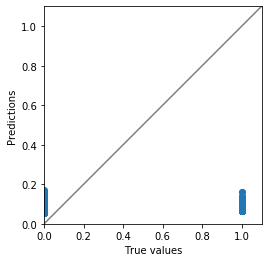

In [107]:
# Plot predictions against ground-truth.
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('square')
# Add some padding to the plot so that all the data can fit in well.
max_val = 1.1 * max(y_test_1.max(), y_pred.max())
plt.xlim([0, max_val])
plt.ylim([0, max_val])
# Add a diagonal line to appreciate better the predictions.
plt.plot([0, max_val], [0, max_val], color='gray')
plt.scatter(y_test_1, y_pred)
# Save as PNG file and display plot.
plt.show()